### Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [42]:
selected_features = pd.read_csv('data/selected_features.csv')
target_column = 'price actual'
y = selected_features[target_column]

In [43]:
try: 
    selected_features.drop(target_column, axis=1, inplace=True)
    selected_features.drop(target_column + ' ewm', axis=1, inplace=True)
except:
    print('Already dropped')

Mean Squared Error: 110.61179603889902
Mean Absolute Percentage Error: 16.333086533968114


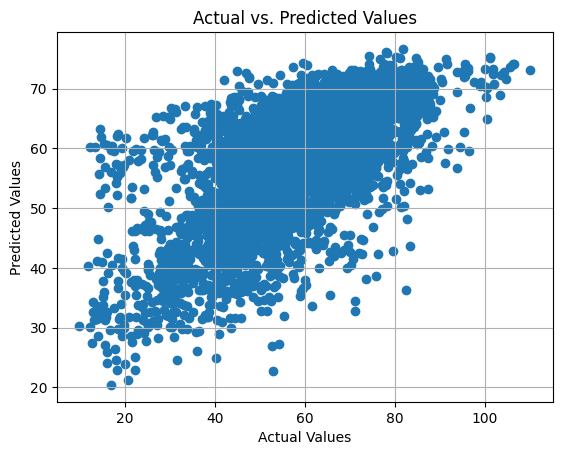

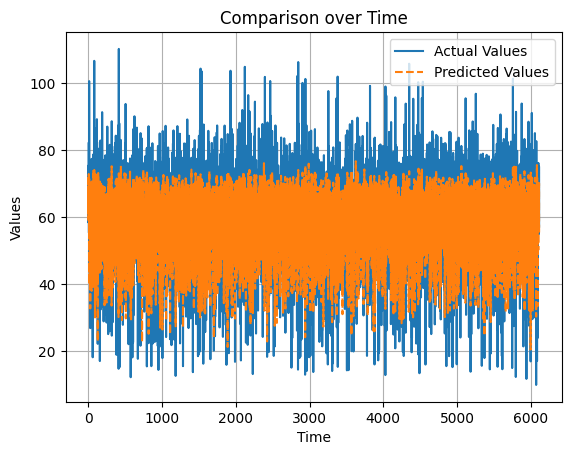

In [44]:
X = selected_features[selected_features.columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
fit = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and Mean Absolute Percentage Error
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

plt.plot(y_test.reset_index(drop=True), label='Actual Values')
plt.plot(y_pred, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Comparison over Time')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 89.82058659119011
Mean Absolute Percentage Error: 13.994038789631558


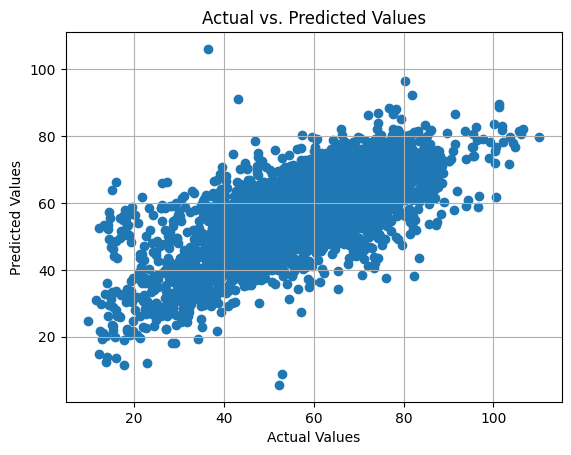

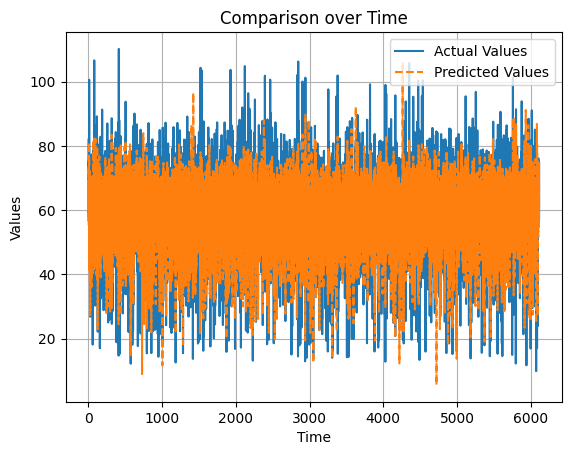

In [45]:
X = selected_features[selected_features.columns]

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a polynomial regression model
degree = 4
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fitting the model
polyreg.fit(X_train, y_train)

# Making predictions
y_pred = polyreg.predict(X_test)

# Calculate Mean Squared Error and Mean Absolute Percentage Error
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

plt.plot(y_test.reset_index(drop=True), label='Actual Values')
plt.plot(y_pred, label='Predicted Values', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Comparison over Time')
plt.legend()
plt.grid(True)
plt.show()